<center><h1>MINERIA DE DATOS</h1>
<strong>Taller Agrupación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>TEMA</strong> Algoritmos de Agrupación</center>

-------
Práctica correspondiente a Agrupación (modelamiento no supervisado) usando diferentes distancias y similitudes para los algoritmos:

* K-means
* Hierarchical clustering
--------

## K-means

### Ejemplo 1
Ejecución del algoritmo k-means en un conjunto de datos de juguete de calificaciones de películas

In [ ]:
#Se crea el conjunto de datos y se visualiza
import pandas as pd

titulos = ['usuario','El viaje de Chihiro','Star Wars','The Matrix','Advengers','Malefica']
puntajes = [['juan',1,5,5,4,2],['ana',2,4,5,3,2],['luis',2,4,4,5,3],['jorge',4,2,2,3,5],['maría',5,1,2,3,4],['oscar',4,2,1,4,5],['mariana',3,5,5,5,3]]
peliculas = pd.DataFrame(puntajes,columns=titulos)
peliculas

,usuario,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,juan,1,5,5,4,2
1,ana,2,4,5,3,2
2,luis,2,4,4,5,3
3,jorge,4,2,2,3,5
4,maría,5,1,2,3,4
5,oscar,4,2,1,4,5
6,mariana,3,5,5,5,3


Para este conjunto de dtaos los tres primeros usuarios y el últomo les gusta las películas de acción, mientras a los tres usuarios restantes les gusta películas de drama. La idea es aplicar el algoritmo de k-means para encontrar los dos grupos de usuarios con preferencias similares de películas. Es necesario remover la primera columna, correspondiente al usuario, ya que no es importante para la agrupación.

In [ ]:
# Se importa los algoritmos de grupación de la libreria de sklearn
from sklearn import cluster

data = peliculas.drop('usuario',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
# La asignación de grupo a cada usuario es visualizada como un objeto dataframe
pd.DataFrame(labels, index=peliculas.usuario, columns=['ID Grupo'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID Grupo
usuario,
juan,1
ana,1
luis,1
jorge,0
maría,0
oscar,0
mariana,1


Los redultados de la agrupación son lo esperado: el algoritmo asignó los tres primeros usuarios y el último al cluster 1, y los otros tres usuarios al cluster 0.

In [ ]:
#Visualización de los centroides de los grupos:

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,4.333333,1.666667,1.666667,3.333333,4.666667
1,2.000000,4.500000,4.750000,4.250000,2.500000


El grupo 0 corresponde con el perfil del usuario que prefiere las películas de drama, mientras el grupo 1 correponde con el perfil de usuarios que prefiere películas de acción.

Estos centroides son el modelo de agrupación, por lo que pueden ser usados para predecir el perfil de un nuevo usuario de acuerdo a la calificación que le asigne a las películas. Por ejemplo, se tienen las siguientes nuevas calificaciones:

In [ ]:
import numpy as np

testData = np.array([[1,4,5,4,2],[5,3,2,2,4],[4,2,3,3,1],[3,3,2,3,3],[4,5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['pedro','marco','liz','nico','ligia']).reshape(-1,1)
cols = peliculas.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,usuario,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica,Cluster ID
0,pedro,1,4,5,4,2,1
1,marco,5,3,2,2,4,0
2,liz,4,2,3,3,1,0
3,nico,3,3,2,3,3,0
4,ligia,4,5,4,1,4,1


### Ejemplo 2
Ejecución del algoritmo k-means a un conjunto de datos sintetico de dos dimensiones numéricas, de 1000 puntos

In [ ]:
# Importar funciones y conjunto de datos

import pandas as pd
from sklearn import cluster
#from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv("cluster1.csv")
X["x0"] = [float(str(i).replace(",", "")) for i in X["x0"]]

La función predict asigna clusters a los ejemplos



In [ ]:
# Lee el archivo de puntos

n_clusters = 2
# ejecuta el k-means con k=2
km = cluster.KMeans(n_clusters=2)
km.fit(X)
y = km.predict(X)
X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(500, 2)

In [ ]:
#Lista los centroides de los clusters
km.cluster_centers_


array([[ 8.01615594,  9.85357474],
       [ 4.5061742 , -0.68473232]])

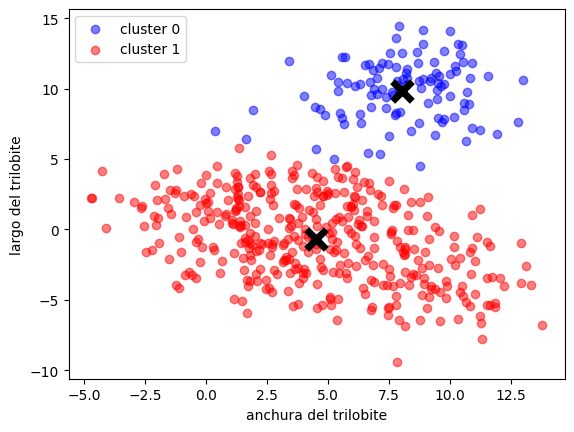

In [ ]:
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr["x0"], Xr["x1"], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

## Iteración del kmeans

Text(0, 0.5, '$x_2$')

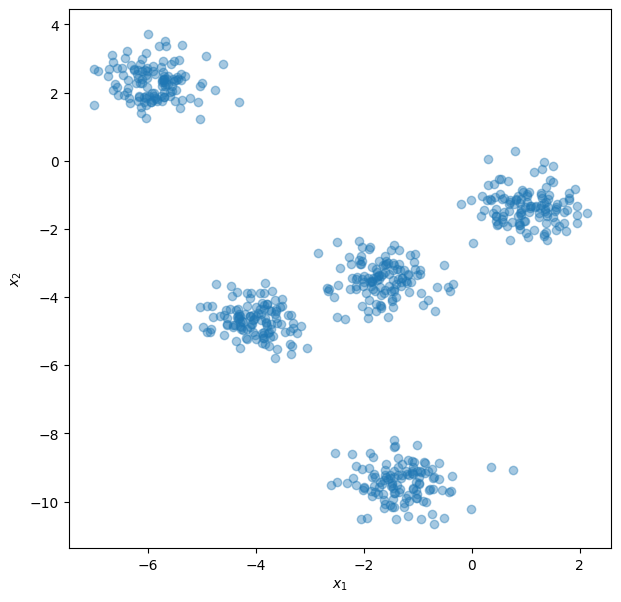

In [ ]:
from sklearn.datasets import make_blobs
np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
X,_=make_blobs(n_samples=600,centers=5, cluster_std=0.5)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(X,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(X.shape[0]),replace=False, size=k)
    clusters=X[init_clus]
    preds=np.argmin(euclidean_distances(X,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=X[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(X,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

all_clusters,all_preds=simple_kmeans(X,5)

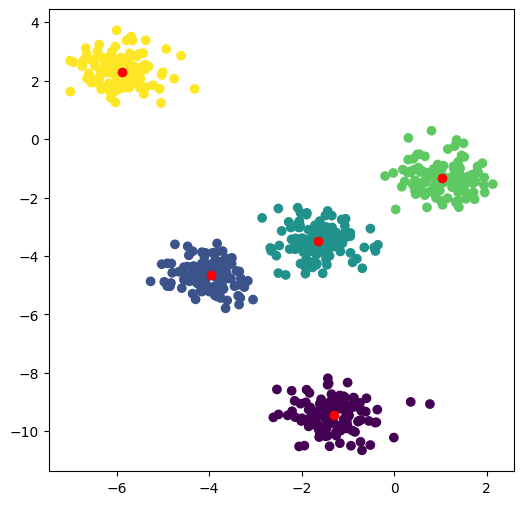

In [ ]:
# Iteración 0. Se realiza la inicialización aleatoriamente, para el ejemplo son 5 puntos,
# y los demas puntos se asignan al cluster más cercano.

iteration=38 #@param {type:"slider", min:0, max:40, step:1}
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")


**Ejercicio 3.**   - JUAN

Usar el algoritmo k-means y distancia Euclidean para agrupar los siguientes puntos en 3

grupos: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). Asumir los centroides iniciales: A1, A4 and A7.

a) Correr una iteración y mostrar: <br />

> 1) Los nuevos grupos <br />

> 2) Los nuevos centroides <br />

b) Iterar más. ¿Cuantas iteraciones se necesita para converger? <br />

c) Mostrar gráficamente (los puntos y centroides) al converger: <br />

> 1) grupos finales <br />
> 2) centroides finales <br />

**Consulta**

1. En que consiste la inicialización kmeans++
2. En que consiste el  Mini Batch K-Means

## Determinar el número de k
La distancia intra-cluster mide qué tan compacto es cada cluster, ecisten varias medidas intra-cluster, una de ellas se define como:



$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

k-means minimiza esta medida, y se utiliza para medir la calidad del cluster. El método consiste en  ejecutar varias veces el k-means con diferentes valores de k,  y graficar el valor de la inercia para cda k. La grafica resultante es una curva que desciende (a myor número de grupos menor la inercia). En esta gráfica se busca un valor de k tan pequeño como sea posible y que tenga un valor de la métrica bajo. A este tipo de gráfica se le conoce usualmente como gráfica de codo o *elbow*:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

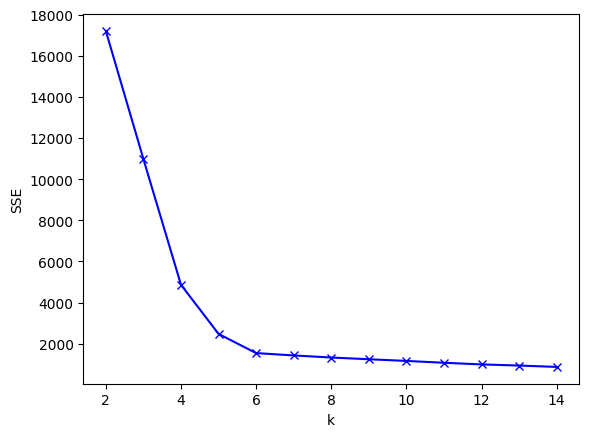

In [ ]:
# Creamos un conjunto sintetico
# Se ejecuta Kmeans, para valores de k entre 2 y 15 y se grafica la inercia con respecto al número de clusters
X,_ = make_blobs(600, cluster_std=1.2, centers=6, random_state=10)

Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()


In [ ]:
# Graficamos los clusters, para visualizar los centroides y comparar con la gráfica del codo
#experiment_number_of_clusters(X, KMeans(), show_metric=True)


**Ejercicios:** - ANDREA

**4.**  Calcular la gráfica del codo para el ejemplo 1 (calificaciones de películas)

**5.** Entrenar un modelo K-means con un conjunto de datos en dos dimensiones, realice una exploración del parámetro $K$. Seleccione un valor apropiado (utilizando el método del codo y argumente su decisión.

**6.** Aplicar el algoritmo k-means al conjunto de datos Iris (sin la clase), para k=2,3,4,5,6,7,8. Dibujar la gáfica de Elbow(codo) basada en el SSE. Explique los resultados.


## Hierarchical Clustering



###Ejemplo1
Usaremos un dataset de vertebrados (ejemplo de TAN) usado para clasificación. Se ejecutaran los tres algoritmos clásicos de agrupacion jerarquica aglomerativa: **single link (MIN), complete link (MAX), y  group average**, usando scipy library de python.



In [ ]:
import pandas as pd
data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [ ]:
# importamos las librerías
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
# Se eliminan la columna de nombre y la clase
X = data.drop(['Name','Class'],axis=1)

###Single Link (MIN)

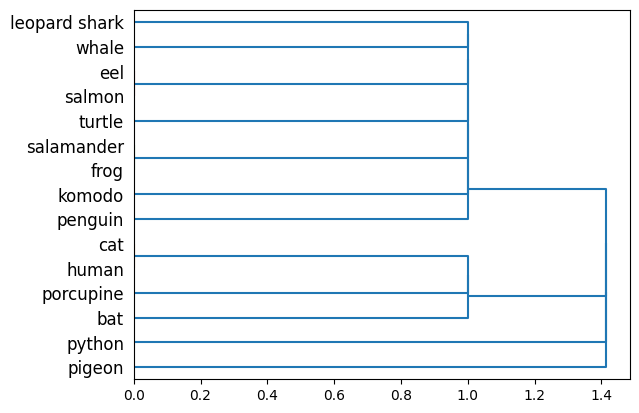

In [ ]:
Z = hierarchy.single(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Complete Link (MAX)

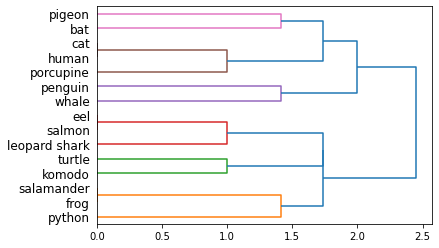

In [ ]:
Z = hierarchy.complete(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Average - Promedio

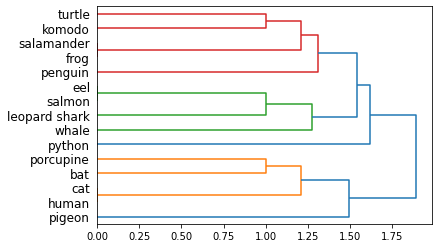

In [ ]:
Z = hierarchy.average(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Ward

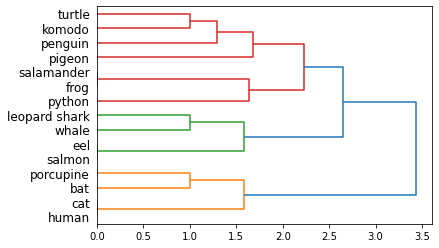

In [ ]:
Z = hierarchy.ward(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Ejercicio 1** -JUAN

¿Qué concluye de los cuatro métodos? con respecto al conjunto de datos usado.

**Ejercicio 2** -JUAN

Dado un conjunto de ejemplos categóricos de 5 dimensiones:


In [ ]:
from scipy.spatial import distance

X = np.array([
              [ 1,0,1,1,0],
              [ 1,1,0,1,0],
              [ 0,0,1,1,0],
              [ 0,1,0,1,0],
              [ 1,0,1,1,0],
              [ 0,1,1,0,0],
             ])
X

array([[1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0]])

a) Aplique agrupamiento jerárquico aglomerativo, usando:

1) Medida intercluster enlace simple (single link o MIN) basado en el coeficiente de Rao. Diagramar el dendograma

2) Medida intercluster enlace completo (complete link o MAX) basado en coeficiente de corres-pondencia simple CCS (su sigla en inglés, SMC Simple Matching Coeficient). Diagramar el dendograma

b) ¿Es posible usar el método de Ward? Explique.

**Ejercicio 3** -ANDREA

Usar el conjunto de datos [“Perfume Data Data Set”](https://archive.ics.uci.edu/ml/datasets/Perfume+Data#) del repositorio UCI (Machine Learning), para:
- Aplicar los algoritmos: single link, complete link average ling y Ward. Graficar dendogramas y explicar resultados.
- Aplicar PCA y nuevamente aplicar los algoritmos y graficar los dendogramas.


**Ejercicio 4** - ANDREA

Usar el data set creado en la sección "Determinar el número de K" y construya un dendograma con distancia euclidiana (from sklearn.metrics.pairwise import euclidean_distances), y otro con similitud coseno (puede utilizar la función de scikit-learn [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)). Discuta los resultados.

## K-Nearest Neighbor

**Ejercicio 1**

Crear un conjunto sintetico de 5 clusters:

Text(0, 0.5, '$x_2$')

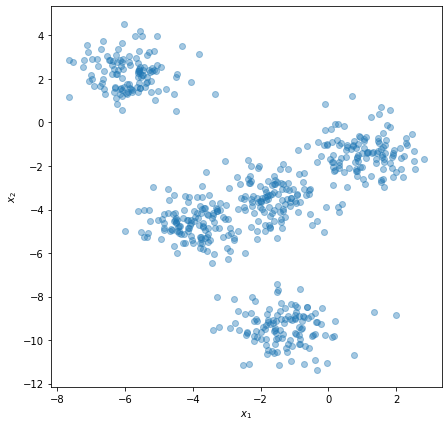

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(2)
# Creación de un dataset sintético de 5 grupos con 600 puntos (se incluyen valores negativos)
X,_=make_blobs(n_samples=600,centers=5, cluster_std=0.8)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],alpha=0.4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

JUAN
Usar el algoritmo de K-Nearest Neighbor y distancia Euclidean para agrupar los datos. Probar con varios valores de umbral.

**Ejercicio 2** - ANDREA

Usar el algoritmo de agrupación K-Nearest Neighbor y distancia Euclidean para agrupar los datos del ejercicio 3. Usar un umbral de 4.

---------
**REFERENCIAS**

[1] TAN y otros. Introduction to Data Mining  (segunda edición)